In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

In [3]:
df = pd.read_csv("../data/Library_Usage.csv", na_values="none")
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016,z,email,True,2003,False,2.0


In [4]:
df.describe()

,Patron Type Code,Total Checkouts,Total Renewals,Year Patron Registered,Supervisor District
count,423448.000000,423448.000000,423448.000000,423448.000000,313138.000000
mean,1.036765,161.982097,59.657327,2010.348917,6.288240
std,4.188198,453.703678,225.009917,4.357374,3.123634
min,0.000000,0.000000,0.000000,2003.000000,1.000000
25%,0.000000,2.000000,0.000000,2007.000000,4.000000
50%,0.000000,19.000000,2.000000,2012.000000,6.000000
75%,1.000000,113.000000,27.000000,2014.000000,9.000000
max,104.000000,35907.000000,8965.000000,2016.000000,11.000000


In [5]:
print(df['Age Range'].unique())

['20 to 24 years' '25 to 34 years' '45 to 54 years' '65 to 74 years'
 '60 to 64 years' '35 to 44 years' nan '55 to 59 years' '10 to 19 years'
 '0 to 9 years' '75 years and over']


In [6]:
print(df['Patron Type Definition'].unique())

['ADULT' 'SENIOR' 'WELCOME' 'TEACHER CARD' 'JUVENILE' 'YOUNG ADULT'
 'STAFF' 'DIGITAL ACCESS CARD' 'SPECIAL' 'AT USER ADULT' 'RETIRED STAFF'
 'VISITOR' 'BOOKS BY MAIL' 'AT USER SENIOR' 'FRIENDS FOR LIFE'
 'AT USER WELCOME' 'AT USER TEEN' 'AT USER JUVENILE']


In [7]:
print(len(df[df['Patron Type Definition'] == 'JUVENILE']))

59208


In [8]:
print(len(df[df['Patron Type Definition'] == 'SENIOR']))

41619


Wie viele Senioren und Kinder sind Kunden der San Francisco Public Library?
Senioren: 41619, 
Kinder: 59208

In [9]:
print(len(df[df['Notice Preference Definition'] == 'email']))

323937


Wie viele Nutzer möchten per Mail informiert werden? 323937 NutzerInnen möchten per eMail informiert werden.

In [10]:
df['print']=df['Notice Preference Definition'] == 'print'
df.columns

Index(['Patron Type Code', 'Patron Type Definition', 'Total Checkouts',
       'Total Renewals', 'Age Range', 'Home Library Code',
       'Home Library Definition', 'Circulation Active Month',
       'Circulation Active Year', 'Notice Preference Code',
       'Notice Preference Definition', 'Provided Email Address',
       'Year Patron Registered', 'Outside of County', 'Supervisor District',
       'print'],
      dtype='object')

In [11]:
df['email']=df['Notice Preference Definition'] == 'email'

In [12]:
notice_pref_def=df.loc[
    (df['Notice Preference Definition'] == "email") | 
    (df['Notice Preference Definition'] == "print")
]

In [113]:
pd.crosstab(
    notice_pref_def['Notice Preference Definition'],
    notice_pref_def['Age Range'],
    margins=True
)

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over,All
Notice Preference Definition,,,,,,,,,,,
email,27475,38055,23809,79351,57698,41450,15328,13805,20299,6508,323778
print,4135,5831,2128,4697,3193,3285,1635,1691,2698,2023,31316
All,31610,43886,25937,84048,60891,44735,16963,15496,22997,8531,355094


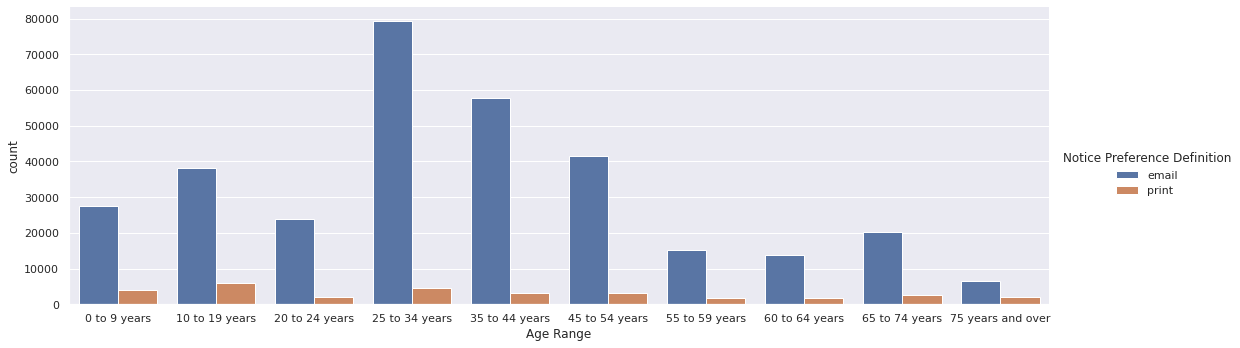

In [13]:
sns.catplot(x='Age Range', kind='count', hue='Notice Preference Definition', data=notice_pref_def, 
            order=['0 to 9 years','10 to 19 years','20 to 24 years','25 to 34 years','35 to 44 years','45 to 54 years', '55 to 59 years', '60 to 64 years','65 to 74 years', '75 years and over'], aspect=3)

In [14]:
pd.crosstab(
    notice_pref_def['Notice Preference Definition'],
    notice_pref_def['Age Range'],
    margins=True, normalize=0
)

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over
Notice Preference Definition,,,,,,,,,,
email,0.084858,0.117534,0.073535,0.245078,0.178202,0.128020,0.047341,0.042637,0.062694,0.020100
print,0.132041,0.186199,0.067952,0.149987,0.101961,0.104898,0.052210,0.053998,0.086154,0.064600
All,0.089019,0.123590,0.073043,0.236692,0.171479,0.125981,0.047770,0.043639,0.064763,0.024025


Wie alt sind diese Nutzer durchschnittlich im Vergleich zu Nutzern, die per Post informiert werden möchten?

In den Altersgruppen:
0-9 Jahre möchten ca. 9% per Mail, 13 % per Post, 
10-19 Jahre möchten ca. 12% per Mail, 19% per Post,
20-25 Jahre möchten ca. 7% per Mail, 7% per Post,
25-34 Jahre möchten ca. 24% per Mail, 15% per Post,
35-44 Jahre möchten ca. 18% per Mail, 10% per Post,
45-54 Jahre möchten ca. 13% per Mail, 10% per Post,
55-59 Jahre möchten ca. 5% per Mail, 5% per Post,
60-64 Jahre möchten ca. 4% per Mail, 5% per Post,
65-74 Jahre möchten ca. 6% per Mail, 9% per Post,
75 Jahre und mehr möchten ca. 2% per Mail, 6% per Post,
informiert werden.

Notiz: Passen die Prozentzahlen zu den Balken bzw. zu den absoluten Zahlen (z.B. in der Altersgruppe der 10-19jährigen? Dort ist die Prozentzahl derjenigen, die per Post informiert werden höher als diejenigen, die sich per Mail informieren lassen möchten. Im Diagramm sieht das anders aus. 

    

Wie viele Ausleihen werden im Mittel pro Altersgruppe und pro Jahr getätigt? Ist die Streuung zwischen den Gruppen gleich?

Gesamtzahl der Ausleihen (Total Checkouts) / Gesamtzahl aller BenutzerInnen (?) pro Altersgruppe (Age Range) in einem Jahr (Circulation Active Year) 

In [15]:
df['Circulation Active Year'] = pd.to_numeric(df['Circulation Active Year'], errors='coerce')

In [19]:
df_ausleihen=df.filter(['Age Range', 'Total Checkouts', 'Circulation Active Year'])
df_ausleihen

,Age Range,Total Checkouts,Circulation Active Year
0,20 to 24 years,0,NaN
1,25 to 34 years,31,2016.0
2,45 to 54 years,0,NaN
3,25 to 34 years,0,NaN
4,45 to 54 years,126,2016.0
...,...,...,...
423443,10 to 19 years,291,2015.0
423444,60 to 64 years,15,2016.0
423445,0 to 9 years,208,2016.0
423446,10 to 19 years,26,2015.0


In [193]:
freq = df_ausleihen['Age Range'].value_counts()
freq

25 to 34 years       91083
35 to 44 years       67390
10 to 19 years       58944
45 to 54 years       52492
0 to 9 years         38242
65 to 74 years       30141
20 to 24 years       29761
55 to 59 years       21230
60 to 64 years       19800
75 years and over    14150
Name: Age Range, dtype: int64

In [40]:
print(df_ausleihen.groupby(by=['Age Range','Circulation Active Year']).sum().groupby(level=[0]).cumsum())

                                           Total Checkouts
Age Range         Circulation Active Year                 
0 to 9 years      2003.0                                 1
                  2004.0                                97
                  2005.0                               284
                  2006.0                               289
                  2007.0                               291
...                                                    ...
75 years and over 2012.0                             49254
                  2013.0                            262669
                  2014.0                            616991
                  2015.0                           1171581
                  2016.0                           4598780

[136 rows x 1 columns]


In [37]:
row_filter_age = df_ausleihen['Age Range'] == '25 to 34 years'
df_ausleihen.loc[row_filter_age]


,Age Range,Total Checkouts,Circulation Active Year
1,25 to 34 years,31,2016.0
3,25 to 34 years,0,NaN
6,25 to 34 years,3002,2016.0
7,25 to 34 years,4,2014.0
8,25 to 34 years,20,2015.0
...,...,...,...
423245,25 to 34 years,2,2014.0
423322,25 to 34 years,1,2015.0
423325,25 to 34 years,9,2016.0
423378,25 to 34 years,955,2013.0


In [54]:
df_ausleihen.groupby(['Age Range','Circulation Active Year', 'Total Checkouts']) ['Age Range'].size()

Age Range          Circulation Active Year  Total Checkouts
0 to 9 years       2003.0                   1                  1
                   2004.0                   46                 1
                                            50                 1
                   2005.0                   2                  1
                                            185                1
                                                              ..
75 years and over  2016.0                   8137               1
                                            8611               1
                                            8868               1
                                            9112               1
                                            9373               1
Name: Age Range, Length: 42427, dtype: int64

In [55]:
df_ausleihen.groupby(['Age Range','Circulation Active Year', 'Total Checkouts']).count()


Empty DataFrame
Columns: []
Index: [(0 to 9 years, 2003.0, 1), (0 to 9 years, 2004.0, 46), (0 to 9 years, 2004.0, 50), (0 to 9 years, 2005.0, 2), (0 to 9 years, 2005.0, 185), (0 to 9 years, 2006.0, 1), (0 to 9 years, 2006.0, 4), (0 to 9 years, 2007.0, 2), (0 to 9 years, 2008.0, 4), (0 to 9 years, 2008.0, 147), (0 to 9 years, 2009.0, 2), (0 to 9 years, 2009.0, 5), (0 to 9 years, 2009.0, 6), (0 to 9 years, 2009.0, 8), (0 to 9 years, 2009.0, 9), (0 to 9 years, 2009.0, 11), (0 to 9 years, 2009.0, 21), (0 to 9 years, 2009.0, 28), (0 to 9 years, 2009.0, 67), (0 to 9 years, 2009.0, 423), (0 to 9 years, 2010.0, 1), (0 to 9 years, 2010.0, 3), (0 to 9 years, 2010.0, 5), (0 to 9 years, 2010.0, 6), (0 to 9 years, 2010.0, 8), (0 to 9 years, 2010.0, 10), (0 to 9 years, 2010.0, 15), (0 to 9 years, 2010.0, 21), (0 to 9 years, 2010.0, 39), (0 to 9 years, 2010.0, 654), (0 to 9 years, 2010.0, 741), (0 to 9 years, 2010.0, 859), (0 to 9 years, 2011.0, 0), (0 to 9 years, 2011.0, 1), (0 to 9 years, 2011.0, 2), (0 to 9 years, 2011.0, 5), (0 to 9 years, 2011.0, 6), (0 to 9 years, 2011.0, 8), (0 to 9 years, 2011.0, 9), (0 to 9 years, 2011.0, 11), (0 to 9 years, 2011.0, 18), (0 to 9 years, 2011.0, 21), (0 to 9 years, 2011.0, 22), (0 to 9 years, 2011.0, 26), (0 to 9 years, 2011.0, 28), (0 to 9 years, 2011.0, 33), (0 to 9 years, 2011.0, 37), (0 to 9 years, 2011.0, 40), (0 to 9 years, 2011.0, 78), (0 to 9 years, 2011.0, 137), (0 to 9 years, 2011.0, 1237), (0 to 9 years, 2012.0, 0), (0 to 9 years, 2012.0, 1), (0 to 9 years, 2012.0, 2), (0 to 9 years, 2012.0, 3), (0 to 9 years, 2012.0, 4), (0 to 9 years, 2012.0, 5), (0 to 9 years, 2012.0, 6), (0 to 9 years, 2012.0, 7), (0 to 9 years, 2012.0, 8), (0 to 9 years, 2012.0, 9), (0 to 9 years, 2012.0, 10), (0 to 9 years, 2012.0, 11), (0 to 9 years, 2012.0, 12), (0 to 9 years, 2012.0, 13), (0 to 9 years, 2012.0, 14), (0 to 9 years, 2012.0, 15), (0 to 9 years, 2012.0, 16), (0 to 9 years, 2012.0, 17), (0 to 9 years, 2012.0, 18), (0 to 9 years, 2012.0, 19), (0 to 9 years, 2012.0, 20), (0 to 9 years, 2012.0, 21), (0 to 9 years, 2012.0, 22), (0 to 9 years, 2012.0, 23), (0 to 9 years, 2012.0, 24), (0 to 9 years, 2012.0, 26), (0 to 9 years, 2012.0, 27), (0 to 9 years, 2012.0, 28), (0 to 9 years, 2012.0, 29), (0 to 9 years, 2012.0, 30), (0 to 9 years, 2012.0, 31), (0 to 9 years, 2012.0, 32), (0 to 9 years, 2012.0, 33), (0 to 9 years, 2012.0, 35), (0 to 9 years, 2012.0, 37), (0 to 9 years, 2012.0, 39), (0 to 9 years, 2012.0, 42), (0 to 9 years, 2012.0, 46), (0 to 9 years, 2012.0, 47), (0 to 9 years, 2012.0, 50), (0 to 9 years, 2012.0, 51), (0 to 9 years, 2012.0, 54), (0 to 9 years, 2012.0, 55), (0 to 9 years, 2012.0, 56), (0 to 9 years, 2012.0, 57), (0 to 9 years, 2012.0, 63), (0 to 9 years, 2012.0, 84), (0 to 9 years, 2012.0, 92), (0 to 9 years, 2012.0, 94), ...]

[42427 rows x 0 columns]

In [94]:
df_ausleihen.value_counts().unstack(level=-1)

Circulation Active Year            2003.0  2004.0  2005.0  2006.0  2007.0  \
Age Range         Total Checkouts                                           
0 to 9 years      0                   NaN     NaN     NaN     NaN     NaN   
                  1                   1.0     NaN     NaN     1.0     NaN   
                  2                   NaN     NaN     1.0     NaN     1.0   
                  3                   NaN     NaN     NaN     NaN     NaN   
                  4                   NaN     NaN     NaN     1.0     NaN   
...                                   ...     ...     ...     ...     ...   
75 years and over 8868                NaN     NaN     NaN     NaN     NaN   
                  9112                NaN     NaN     NaN     NaN     NaN   
                  9373                NaN     NaN     NaN     NaN     NaN   
                  9888                NaN     NaN     NaN     NaN     NaN   
                  10637               NaN     NaN     NaN     NaN     NaN   

Circulation Active Year            2008.0  2009.0  2010.0  2011.0  2012.0  \
Age Range         Total Checkouts                                           
0 to 9 years      0                   NaN     NaN     NaN     1.0     5.0   
                  1                   NaN     NaN     2.0     1.0    43.0   
                  2                   NaN     1.0     NaN     3.0    25.0   
                  3                   NaN     NaN     1.0     NaN    35.0   
                  4                   1.0     NaN     NaN     NaN    19.0   
...                                   ...     ...     ...     ...     ...   
75 years and over 8868                NaN     NaN     NaN     NaN     NaN   
                  9112                NaN     NaN     NaN     NaN     NaN   
                  9373                NaN     NaN     NaN     NaN     NaN   
                  9888                NaN     NaN     NaN     NaN     NaN   
                  10637               NaN     NaN     NaN     NaN     NaN   

Circulation Active Year            2013.0  2014.0  2015.0  2016.0  
Age Range         Total Checkouts                                  
0 to 9 years      0                   7.0    18.0    35.0    32.0  
                  1                 180.0   249.0   362.0   301.0  
                  2                 119.0   190.0   341.0   323.0  
                  3                 105.0   172.0   278.0   369.0  
                  4                 103.0   175.0   257.0   384.0  
...                                   ...     ...     ...     ...  
75 years and over 8868                NaN     NaN     NaN     1.0  
                  9112                NaN     NaN     NaN     1.0  
                  9373                NaN     NaN     NaN     1.0  
                  9888                NaN     NaN     1.0     NaN  
                  10637               NaN     NaN     1.0     NaN  

[19739 rows x 14 columns]

In [108]:
df_ausleihen_age=df.filter(['Age Range', 'Total Checkouts', 'Circulation Active Year'])
df.groupby(['Circulation Active Year']).agg({'Age Range': ['count']})
print(df_ausleihen_age)

             Age Range  Total Checkouts  Circulation Active Year
0       20 to 24 years                0                      NaN
1       25 to 34 years               31                   2016.0
2       45 to 54 years                0                      NaN
3       25 to 34 years                0                      NaN
4       45 to 54 years              126                   2016.0
...                ...              ...                      ...
423443  10 to 19 years              291                   2015.0
423444  60 to 64 years               15                   2016.0
423445    0 to 9 years              208                   2016.0
423446  10 to 19 years               26                   2015.0
423447    0 to 9 years                0                      NaN

[423448 rows x 3 columns]


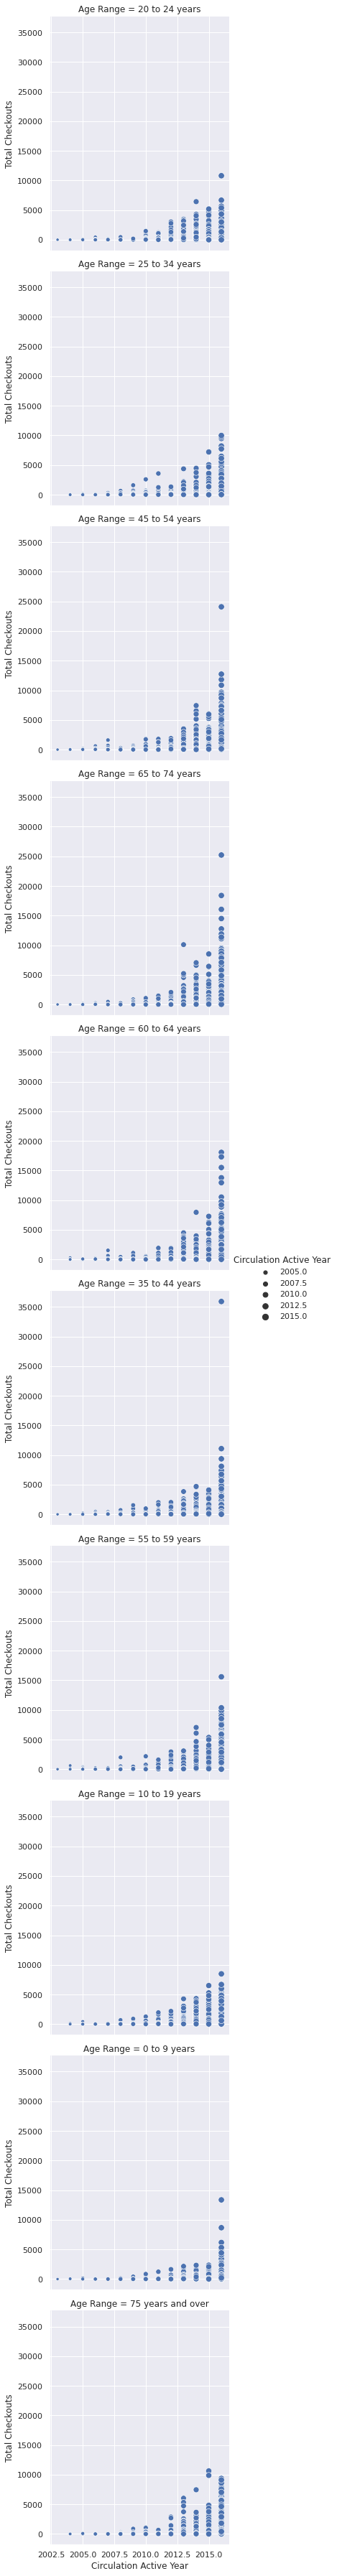

In [111]:
sns.relplot(x='Circulation Active Year', y='Total Checkouts',
            size='Circulation Active Year',
           row='Age Range', data=df_ausleihen)

In [125]:
pd.crosstab(
    df_ausleihen['Age Range'],
    df_ausleihen['Total Checkouts']
)

Total Checkouts,0,1,2,3,4,5,6,7,8,9,...,14502,15505,15598,16060,17308,18064,18397,24093,25223,35907
Age Range,,,,,,,,,,,,,,,,,,,,,
0 to 9 years,4509,1140,1005,960,940,836,777,611,612,572,...,0,0,0,0,0,0,0,0,0,0
10 to 19 years,7398,1772,1464,1243,1120,1012,854,829,742,667,...,0,0,0,0,0,0,0,0,0,0
20 to 24 years,6251,3155,1751,1309,1046,769,667,565,526,452,...,0,0,0,0,0,0,0,0,0,0
25 to 34 years,20218,8133,5277,4108,3250,2847,2422,2154,1891,1607,...,0,0,0,0,0,0,0,0,0,0
35 to 44 years,11991,3371,2401,2055,1736,1541,1331,1199,1055,1039,...,0,0,0,0,0,0,0,0,0,1
45 to 54 years,8591,2379,1572,1326,1042,964,816,737,716,595,...,0,0,0,0,0,0,0,1,0,0
55 to 59 years,3755,983,627,551,426,353,312,284,271,247,...,0,0,1,0,0,0,0,0,0,0
60 to 64 years,3530,787,602,472,372,319,297,221,241,213,...,0,1,0,0,1,1,0,0,0,0
65 to 74 years,5389,1185,862,624,514,460,412,361,314,298,...,1,0,0,1,0,0,1,0,1,0


In [135]:
df_ausleihen[['Age Range', 'Total Checkouts']].groupby(by='Age Range').mean()

,Total Checkouts
Age Range,
0 to 9 years,135.988390
10 to 19 years,236.651042
20 to 24 years,108.856692
25 to 34 years,50.472415
35 to 44 years,110.665351
45 to 54 years,193.190848
55 to 59 years,242.424258
60 to 64 years,271.689646
65 to 74 years,294.584519


In [134]:
df_ausleihen[['Age Range', 'Total Checkouts']].groupby(by=['Age Range', 'Circulation Active Year']).mean()

KeyError: 'Circulation Active Year'